<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Boxplot for MEDV

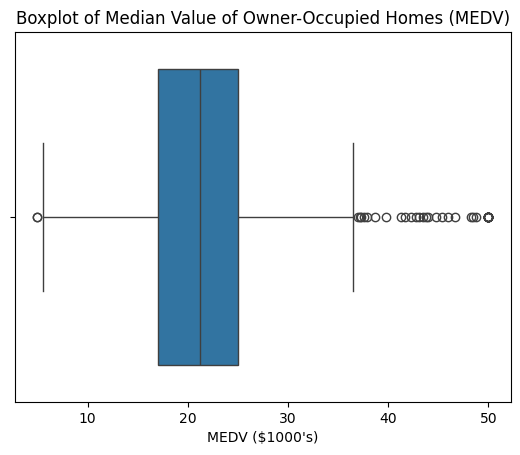

In [8]:

ax = sns.boxplot(x='MEDV', data=boston_df)
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.xlabel("MEDV ($1000's)")
pyplot.show()

# Bar plot for CHAS (Charles River)

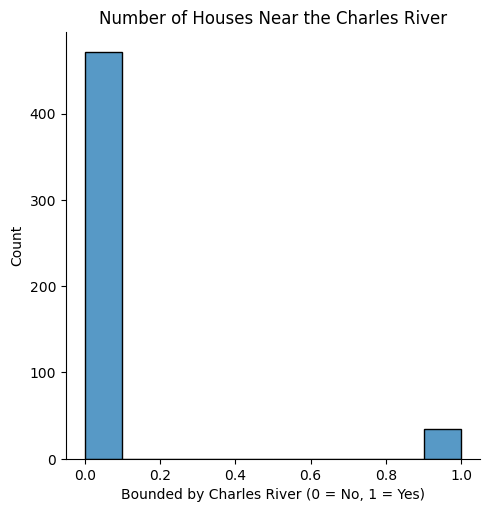

In [9]:

ax = sns.displot(boston_df['CHAS'], kde = False)
pyplot.title("Number of Houses Near the Charles River")
pyplot.xlabel("Bounded by Charles River (0 = No, 1 = Yes)")
pyplot.ylabel("Count")
pyplot.show()

# Boxplot for MEDV vs AGE Group

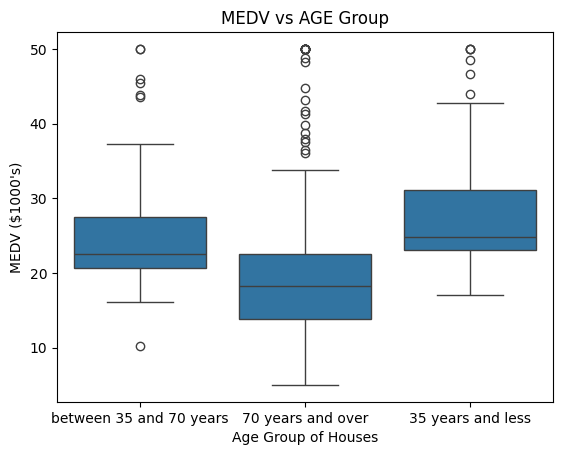

In [10]:

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and less'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and over'
ax = sns.boxplot(x=boston_df['age_group'], y=boston_df['MEDV'], data=boston_df)
pyplot.title("MEDV vs AGE Group")
pyplot.xlabel("Age Group of Houses")
pyplot.ylabel("MEDV ($1000's)")
pyplot.show()

# Scatter plot for NOX vs INDUS

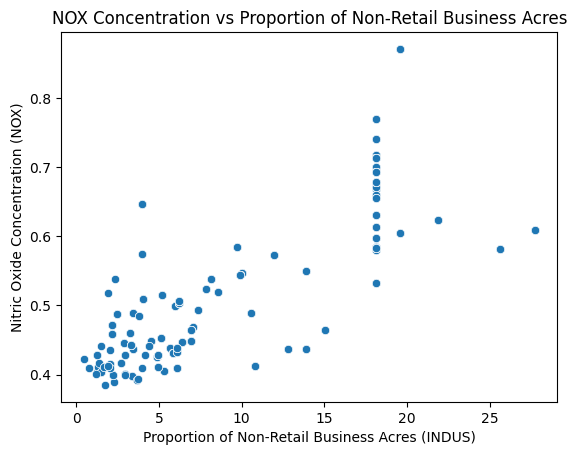

In [11]:

sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title("NOX Concentration vs Proportion of Non-Retail Business Acres")
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.show()

Conclusion: NOX and INDUS are positively proportional, 

# Histogram for PTRATIO

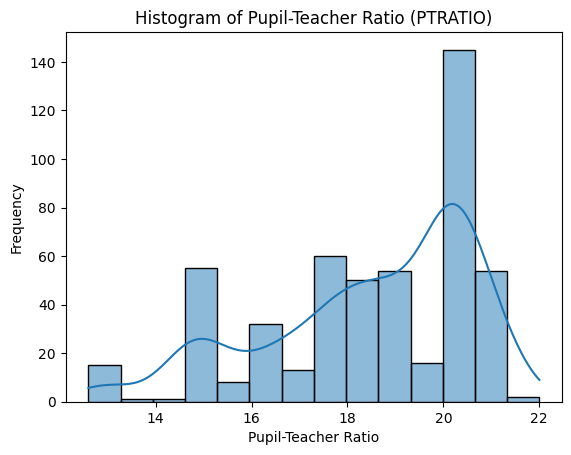

In [12]:

sns.histplot(boston_df['PTRATIO'],  kde=True)
pyplot.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

# T-test for CHAS vs MEDV

Null hypothesis: there's no significant difference in median value of houses bounded by the Charles river

Alternative hypothesis: there's a significant difference in median value of houses bounded by the Charles river

In [13]:

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(group1, group0)
print( "t-statistic:", t_stat, "p-value:", p_value)
print("Conclusion: As p-value<0.05, There is a significant difference between median values of homes located near the Charles River and those that are not.")


t-statistic: 3.996437466090509 p-value: 7.390623170519905e-05
Conclusion: As p-value<0.05, There is a significant difference between median values of homes located near the Charles River and those that are not.


# ANOVA for MEDV vs AGE Group
Null hypothesis: there is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940

Alternative hypothesis: there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940 

In [14]:


boston_df.loc[(boston_df['AGE'] <= 1940), 'age_house'] = 'before 1940'
boston_df.loc[(boston_df['AGE'] >= 57), 'age_house'] = 'after 1940'

scipy.stats.levene(boston_df[boston_df['age_house'] == 'before 1940']['MEDV'],
                   boston_df[boston_df['age_house'] == 'after 1940']['MEDV'], 
                   center='mean')

forty_lower = boston_df[boston_df['age_house']  == 'before 1940']['MEDV']
forty_upper = boston_df[boston_df['age_house'] == 'after 1940']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

print("Conclusion: As p-value<0.05, There is a significant difference between median values of homes with age older the 1940 and those that are not.")

F_Statistic: 53.6136461836425, P-Value: 9.722834635547578e-13
Conclusion: As p-value<0.05, There is a significant difference between median values of homes with age older the 1940 and those that are not.


# Pearson correlation for NOX vs INDUS
Null hypothesis: There is no correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town

Alternative hypothesis: There is a correlation between Nitric Oxide concentration and the proportion of non-retail business acres per town

In [15]:

corr, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: {corr}, p-value: {p_val}")

print("Conclusion: Since p-value<0.05, There is a significant difference between Nox and INDUS.")

Pearson Correlation: 0.7636514469209192, p-value: 7.913361061210442e-98
Conclusion: Since p-value<0.05, There is a significant difference between Nox and INDUS.


# Regression for DIS vs MEDV 

Null hypothesis: There is no correlation between distance and the median values

Alternative hypothesis: There is a correlation correlation between distance and the median values

In [19]:

X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        11:41:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Conclusion:

"Proportional regression between distance and the median values."